# Understanding Features

***我们首先抛出一个显示的问题?***<br>
     <br>人类如何玩拼图 jigsaw puzzle games
     <br>--> 计算机是否可以玩拼图
    <br>--> 计算机是否可以拼接stitching 图片
    <br>--> 给定一些图片 生产3D model
    
***How do we arrange lots of scrambled image pieces into a big single image?***<br>

answer:<br> 
we should be looking for specific patterns or specific features
which are unique.<br>
我们需要找一些独特的特殊模式和特征<br>

***Features***

* flat surfaces -- hard to track
* edges --better than flat surfaces but still not good enough
* corners --good features 
* blobs 斑点 --good features

<br>***Feature Description***
<br>find the feature and describe them --> in order to find same features in other images and align them 

# Harris corner Detection

> corners are regions in the image with large variation in intensity in all the directions<br>
> corners 像素变化剧烈

> Harris corner Detection --> A combined corner and edge detector<br>
> 原理： finds the difference in intensity for a displacement of (u,v) in all directions.
> [原理详解](https://blog.csdn.net/jia20003/article/details/16908661)

### Harris corner detector in Opencv
> function : cv2.cornerHarris()
>> args:
- img - input image
- blockSize - size of neighbourhood considered for corner detection
- ksize - Aperture parameter of Sobel derivative used.
- k - Harris detector free params in the equation (0.04-0.06)

In [2]:
import cv2
import numpy as np

In [38]:
filename = "asset/1_3.jpg"
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
print(gray,gray.shape)

[[ 252.  253.  254. ...,  252.  250.  250.]
 [ 253.  253.  254. ...,  253.  251.  251.]
 [ 254.  254.  255. ...,  254.  253.  252.]
 ..., 
 [ 239.  255.  249. ...,  243.  242.  253.]
 [ 253.  229.  254. ...,  248.  249.  251.]
 [ 253.  249.  254. ...,  253.  251.  251.]] (224, 224)


In [39]:
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
print(dst)

[[  6.10507846e-01   6.10507846e-01   6.10507846e-01 ...,   6.32640648e+00
    6.32640648e+00   6.32640648e+00]
 [  6.10507846e-01   6.10507846e-01   6.10507846e-01 ...,   6.32640648e+00
    6.32640648e+00   6.32640648e+00]
 [  6.10507846e-01   6.10507846e-01   6.10507846e-01 ...,   6.32640648e+00
    6.32640648e+00   6.32640648e+00]
 ..., 
 [  1.32480219e+05   1.43190938e+06   1.43190938e+06 ...,   5.23248120e+07
    3.07994800e+07   1.14087812e+06]
 [  3.69033203e+01   3.69674377e+02   2.86441375e+05 ...,   5.23248120e+07
    3.07994800e+07   1.14087812e+06]
 [  3.69033203e+01   3.69674377e+02   3.69674377e+02 ...,   5.23248120e+07
    3.07994800e+07   1.14087812e+06]]


In [42]:
img[dst>0.01*dst.max()] = [0,0,255]

In [43]:
cv2.imshow('dst',img)
if cv2.waitKey(0) ==27:
    cv2.destroyAllWindows()

# Shi-Tomasi Corner Derector & Good Features to track

> cv2.goodFeaturesToTrack()

In [45]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 

In [45]:
img = cv2.imread("asset/1_3.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray.shape

(224, 224)

In [46]:
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
corners.shape

(25, 1, 2)

In [47]:
cv2.goodFeaturesToTrack?

In [48]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

In [49]:
cv2.circle?

[cv 常见绘图函数](https://blog.csdn.net/qq_18343569/article/details/50275477)

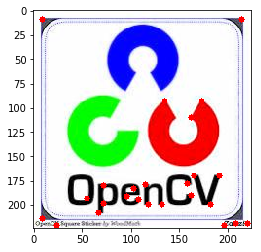

In [50]:
plt.imshow(img)
plt.show()

# SIFT (scale-invariant feature transform)

> Harris is rotation-invariant but not scale-invariant

In [489]:
import numpy as np
import cv2

In [490]:
raw_img1= cv2.imread("input/img01.jpg")
raw_img2= cv2.imread("input/img02.jpg")


In [491]:
sift=cv2.xfeatures2d.SIFT_create(200)

In [492]:
kps1 ,des1= sift.detectAndCompute(raw_img1,None)
kps2 ,des2= sift.detectAndCompute(raw_img2,None)

In [493]:
bf = cv2.BFMatcher()

In [494]:
match_list = bf.knnMatch(des1,des2,2)
len(match_list)

200

In [541]:
good=[ m for m,n in match_list if m.distance < 0.7* n.distance]
len(good)

134

In [555]:
src_pts = np.float32([ kps1[m.queryIdx].pt for m in good ])
dst_pts = np.float32([ kps2[m.trainIdx].pt for m in good ])

In [543]:
src_pts[0]

array([ 3545.25097656,  3519.30859375], dtype=float32)

In [544]:
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

In [545]:
M

array([[  1.12870367e+00,   4.81487653e-03,  -3.80213471e+02],
       [  8.84730075e-02,   1.06671279e+00,  -1.70889972e+02],
       [  3.46625384e-05,  -2.94172471e-07,   1.00000000e+00]])

In [546]:
m_inlier = mask.ravel()

In [547]:
M = cv2.findHomography(src_pts[m_inlier==1], dst_pts[m_inlier==1])[0]

In [548]:
M

array([[  1.12870367e+00,   4.81487653e-03,  -3.80213471e+02],
       [  8.84730075e-02,   1.06671279e+00,  -1.70889972e+02],
       [  3.46625384e-05,  -2.94172471e-07,   1.00000000e+00]])

In [554]:
src_pts

array([[ 2771.72998047,  3192.59594727],
       [ 1207.05761719,  3410.55786133],
       [ 1463.59265137,  4310.71191406],
       [ 2830.61621094,   595.84350586],
       [ 1779.28112793,  3207.578125  ],
       [ 3275.39746094,  3015.29467773],
       [ 3471.05419922,  3300.60595703],
       [ 3476.98974609,  3294.18408203],
       [ 3153.6015625 ,  3775.42163086],
       [ 2743.61010742,  3223.33740234],
       [ 1648.75915527,  3215.52416992],
       [  836.40374756,  4548.61962891],
       [ 2813.66650391,  3194.30004883],
       [ 3471.31030273,  2984.37036133],
       [ 3545.25097656,  3519.30859375],
       [ 1447.88720703,  4310.84423828],
       [ 1762.24353027,  3205.20483398],
       [ 1745.83459473,  3791.07446289],
       [ 3494.04125977,  3056.94433594],
       [ 1299.97900391,  3392.69946289],
       [ 3406.49365234,  3672.22802734],
       [ 3202.48022461,  2970.47607422],
       [ 3008.61547852,  3165.8972168 ],
       [  479.80230713,   843.55090332],
       [ 2749.21

In [550]:
def random_partition(data):
    np.random.shuffle(data.copy())
    twoPoints = data[:2]
    samplePoint = data[2:]
    return twoPoints,samplePoint
    

In [552]:
a,b = random_partition(src_pts)

In [553]:
src_pts

array([[ 2771.72998047,  3192.59594727],
       [ 1207.05761719,  3410.55786133],
       [ 1463.59265137,  4310.71191406],
       [ 2830.61621094,   595.84350586],
       [ 1779.28112793,  3207.578125  ],
       [ 3275.39746094,  3015.29467773],
       [ 3471.05419922,  3300.60595703],
       [ 3476.98974609,  3294.18408203],
       [ 3153.6015625 ,  3775.42163086],
       [ 2743.61010742,  3223.33740234],
       [ 1648.75915527,  3215.52416992],
       [  836.40374756,  4548.61962891],
       [ 2813.66650391,  3194.30004883],
       [ 3471.31030273,  2984.37036133],
       [ 3545.25097656,  3519.30859375],
       [ 1447.88720703,  4310.84423828],
       [ 1762.24353027,  3205.20483398],
       [ 1745.83459473,  3791.07446289],
       [ 3494.04125977,  3056.94433594],
       [ 1299.97900391,  3392.69946289],
       [ 3406.49365234,  3672.22802734],
       [ 3202.48022461,  2970.47607422],
       [ 3008.61547852,  3165.8972168 ],
       [  479.80230713,   843.55090332],
       [ 2749.21

In [ ]:
def racsacAlgo(data,num,iter,thresDist,inlinerRatio):
    for i in range(iter):
        # randomly select 2 points
        sample =(data[r] for r in np.randint(0,len(data),2))
        # fit two points 
        y = np.poly1d(np.polyfit([i[0] for i in sample],[i[1] for i in sample],1))   